# RNA-Seq Annotation and Analysis
This code was used to annotate DESeq2 results for Control cranial neural crest cells isolated by FACS at multiple stages 

Data From:
- Reconstruction of the Global Neural Crest Gene Regulatory Network In Vivo
- Williams et al., 2019, Developmental Cell

Required inputs for this script:

1. galGal6 genome annotation file (downloaded from Ensembl BioMart: https://m.ensembl.org/biomart/martview/31b9dc3565fd6ef5dd2af0381eed2461, or available at https://github.com/mpiacentino/2021-Essential-function-and-targets-of-BMP-signaling-during-midbrain-neural-crest-delamination/blob/master/Fig3_RNASeq/0_sourcedata/galGal6_annotations.csv)
2. DESeq2 results comparing samples from 5-6ss and 8-10ss, values used for Volcano plots
3. featureCounts table containing counts for each transcript in each sample (non-NC, 5-6ss NC, 8-10ss NC), values used for Heatmap analysis

Script prepared by Mike Piacentino, January 2021

## Import packages

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
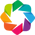

In [1]:
# Data handling
import pandas as pd
import numpy as np
import scipy.special
import datetime

# Plotting
import bokeh
import bokeh.io
import iqplot
import bokeh.plotting
from bokeh.io import export_png
import holoviews as hv
import seaborn as sns
bokeh.io.output_notebook()
hv.extension('bokeh')

# Get current date for naming output files
now = datetime.datetime.now()
analysis_date = now.strftime("%Y%m%d")

# Import and Compile Data

## Read in genome annotation file 

Make sure that this genome annotation file contains the Ensembl Gene ID number, the gene name and description, and the GO term and GOSlim data

In [2]:
# Call genome annotation file
galGal6 = pd.read_csv('../Inputs/galGal6_annotations.csv')
galGal6 = galGal6.rename(columns={"Gene stable ID": "GeneStableID", "Gene name": "GeneName", "Gene description":"GeneDescription"})  # Rename some columns for easier cleaning later

# Fix incomplete annotations in galGal6 genome
galGal6.loc[(galGal6['GeneStableID'] == 'ENSGALG00000030902'),'GeneName']='SNAI2'     # SNAI2 record on Ensembl does not list 'SNAI2' in 'Gene name'
galGal6.loc[(galGal6['GeneStableID'] == 'ENSGALG00000043204'),'GeneName']='PAX7'     # Pax7 record on Ensembl does not list 'Pax7' in 'Gene name'

# Missing entries from BioMart export of galGal6:
galGal6.loc[len(galGal6.index)] = ['ENSGALG00000042686', 'FOXD3', 
                                   'forkhead box D3 [Source:NCBI gene;Acc:395794]', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'] 

# Display dataframe
# galGal6.head()

## Define GO term identifier to parse

In [3]:
# Define the identifier you'd like to use, and the column (GO vs GOSlim) you'd like to explore
identifier = 'lipid'
GO_mode = 'GO term name'

# Loop to print out all related identifiers
descriptors = galGal6[GO_mode].unique()

# # Optional: print identifiers to view what is included
# for term in descriptors:
#     if identifier in str(term):
#         print(term)
        
# Save out all GO term names
GO_terms = pd.DataFrame(descriptors)
# GO_terms.to_csv("AllGOTerms.csv")

## Read in DESeq2 results

In [4]:
# Read in RNASeq dataframe (from DESeq2 output)
file_ = '../Inputs/Chick_8ssvs5ss_DESeq2_results.csv'
deseq = pd.read_csv(file_)

# Calculate -log(padj) for later plotting
deseq['neglogpadj'] = -(np.log10(deseq['padj']))
deseq['log2FC'] = deseq['log2FoldChange'] * 1

# Merge annotations with deseq results
merge = pd.merge(deseq, galGal6, left_on='Gene id', right_on='GeneStableID')
merge = merge.drop(columns='KEGG Pathway and Enzyme ID')
merge = merge.dropna()

### OPTIONAL: Save out brief dataframe for other forms of plotting
# Drop subset of annotations for a more reasonable size file for plotting (removes duplicate entries)
merge_brief = merge.filter(['GeneStableID','GeneName','GeneDescription', 'baseMean', 'log2FC', 
                                                  'padj', 'neglogpadj'], axis=1).drop_duplicates()

# Save out brief annotated dataframe
merge_brief.to_csv('../' + analysis_date + ' annotated DESeq2 all genes pre_vs_mig.csv')
merge_brief.head()

GeneStableID GeneName  \
0     ENSGALG00000036638    TACR1   
234   ENSGALG00000033695  CYP26A1   
387   ENSGALG00000030251    ADCY8   
1179  ENSGALG00000011205    SMOC2   
1579  ENSGALG00000040493      PTN   

                                        GeneDescription     baseMean  \
0     tachykinin receptor 1 [Source:NCBI gene;Acc:39...   168.308398   
234   cytochrome P450 family 26 subfamily A member 1...   775.149907   
387   adenylate cyclase 8 [Source:NCBI gene;Acc:420328]   316.646467   
1179  SPARC related modular calcium binding 2 [Sourc...    51.802830   
1579         pleiotrophin [Source:NCBI gene;Acc:418125]  8449.893733   

        log2FC          padj  neglogpadj  
0    -2.654806  1.279081e-18   17.893102  
234  -3.153533  5.973804e-17   16.223749  
387   2.491760  8.762800e-13   12.057357  
1179  4.345453  1.131207e-11   10.946458  
1579  2.088634  6.956791e-11   10.157591

## Tidy data for subsequent analysis

* (optional) Filter genes based on GO term (defined above)

* Filter based on predefined expression, significance/FDR, and fold change thresholds:
    * Mean expression ('baseMean') must be >= 45
    * False Discovery Rate (FDR, 'padj') must be < 0.05
    * Fold change must be greater than 1.6 fold (equivalent to log2FoldChange > 0.678)

In [5]:
# Organize full DESeq2 results for plotting
all_genes = merge.filter(['GeneStableID','GeneName','GeneDescription', 'baseMean', 'log2FC', 
                                                  'padj', 'neglogpadj'], axis=1).drop_duplicates()
    
### Optional: Filter on GO term ###
# Pull out only identifier associated genes
identifier_associated = (merge[merge[GO_mode].str.contains(identifier)])

# Add mis-annotated genes
more_genes = ('RFTN2')
add_genes = (merge[merge['GeneName'].str.contains(more_genes)])
identifier_associated = pd.concat([identifier_associated, add_genes])
###################################


# Set threhsolds for expression level, significance, and parse out upregulated and downregulated DEGS
identifier_associated = identifier_associated.filter(['GeneStableID','GeneName','GeneDescription', 'baseMean', 'log2FC', 
                                                  'padj', 'neglogpadj'], axis=1).drop_duplicates()
expressed_genes = (identifier_associated[(identifier_associated['baseMean'] > 45)])
significant_genes = (expressed_genes[(expressed_genes['padj'] < 0.05)])
significant_up = (significant_genes[(significant_genes['log2FC'] > 0.678)])
significant_down = (significant_genes[(significant_genes['log2FC'] < -0.678)])

# Print out number of parsed genes
print(str(len(identifier_associated))+' genes with ' + GO_mode + ' containing "'+ identifier+'"')
print(str(len(expressed_genes))+' expressed genes with ' + GO_mode + ' containing "'+ identifier+'".')
print(str(len(significant_down)+len(significant_up))
      +' significant DEGs with ' + GO_mode + ' containing "'+ identifier+'".')
print(str(len(significant_up))
      +' significantly enriched DEGs with ' + GO_mode + ' containing "'+ identifier+'".')
print(str(len(significant_down))
      +' significantly depleted DEGs with ' + GO_mode + ' containing "'+ identifier+'".')
        
# View significant identifier-associated DEGs for manual curration (see next code block)
significant_genes

572 genes with GO term name containing "lipid"
453 expressed genes with GO term name containing "lipid".
18 significant DEGs with GO term name containing "lipid".
11 significantly enriched DEGs with GO term name containing "lipid".
7 significantly depleted DEGs with GO term name containing "lipid".


GeneStableID GeneName  \
8949   ENSGALG00000006662   BPIFB3   
10048  ENSGALG00000034950    SMPD3   
13292  ENSGALG00000037050    FABP3   
14393  ENSGALG00000003193  CRABP-I   
16272  ENSGALG00000005843   EEF1A2   
17036  ENSGALG00000010645    ENPP6   
19740  ENSGALG00000016721   PLCXD1   
39665  ENSGALG00000009803    MGST2   
42407  ENSGALG00000014933     HEXB   
54222  ENSGALG00000041764   VSTM2A   
54252  ENSGALG00000014868  SERINC1   
55459  ENSGALG00000004553    SGPL1   
59621  ENSGALG00000006378     LIPA   
64723  ENSGALG00000006805   PLSCR1   
67949  ENSGALG00000004621    PREX1   
83262  ENSGALG00000036492    DAGLA   
94230  ENSGALG00000043833     OLAH   
13006  ENSGALG00000036471    RFTN2   

                                         GeneDescription      baseMean  \
8949   BPI fold containing family B member 3 [Source:...    532.493966   
10048  sphingomyelin phosphodiesterase 3 [Source:NCBI...    790.290429   
13292  fatty acid binding protein 3 [Source:NCBI gene...   3154.340760   
14393  cellular retinoic acid binding protein 1 [Sour...    728.591400   
16272  eukaryotic translation elongation factor 1 alp...    189.032735   
17036  ectonucleotide pyrophosphatase/phosphodiestera...    209.560763   
19740  phosphatidylinositol specific phospholipase C ...    112.877198   
39665  microsomal glutathione S-transferase 2 [Source...     46.265836   
42407  hexosaminidase subunit beta [Source:NCBI gene;...    324.353739   
54222  V-set and transmembrane domain containing 2A [...     47.609919   
54252  serine incorporator 1 [Source:NCBI gene;Acc:42...  12792.197010   
55459  sphingosine-1-phosphate lyase 1 [Source:NCBI g...   2578.445706   
59621  lipase A, lysosomal acid type [Source:NCBI gen...    865.323714   
64723  phospholipid scramblase 1 [Source:NCBI gene;Ac...    428.442024   
67949  phosphatidylinositol-3,4,5-trisphosphate depen...   1259.561386   
83262  diacylglycerol lipase alpha [Source:NCBI gene;...    351.683899   
94230  oleoyl-ACP hydrolase [Source:NCBI gene;Acc:420...     68.102988   
13006  raftlin family member 2 [Source:NCBI gene;Acc:...   3449.435638   

         log2FC      padj  neglogpadj  
8949  -1.535756  0.000096    4.016192  
10048  1.604593  0.000125    3.901852  
13292  1.315494  0.000225    3.648035  
14393  1.477229  0.000332    3.479474  
16272 -1.336407  0.000840    3.075466  
17036 -1.666407  0.001684    2.773734  
19740 -1.463598  0.001968    2.705938  
39665  1.823342  0.006259    2.203490  
42407  1.262376  0.007811    2.107290  
54222 -2.226105  0.012921    1.888705  
54252 -0.851353  0.013115    1.882224  
55459 -1.114354  0.013667    1.864341  
59621  0.726624  0.016121    1.792608  
64723  1.063284  0.022580    1.646268  
67949  0.950980  0.025866    1.587274  
83262  0.917012  0.039029    1.408617  
94230  1.630921  0.043814    1.358383  
13006  1.679414  0.000206    3.685788

## Manual Curation
This is an important step if you see any genes above that do not belong in this list, or incompletely annotated gene IDs. 

For example, using one parsing mechanism, I saw "BMP5" and "PDGFRA" as genes I knew should not be in my analysis, and should be removed.
Additionally, I found ENSGALG00000029862 did not have an associated gene name or description associated, and I wanted to add that information manually.

If there are no errors above, you can skip this code block. If the genes in remove_genes list or the values in the unidentified_genes dictionary are not in your significant_genes dataframe, then running this code block will not change anything.

In [6]:
### Removal of genes that are wrongly annotated by the selected GO term ###
# Define genes to be removed that are inappropriately annotated as identifier-associated
remove_genes = ['BMP5', 'PDGFRA']

# Remove defined genes that are inappropriately annotated as identifier-associated
significant_genes = significant_genes[~significant_genes['GeneName'].isin(remove_genes)]


### Fixing any incomplete annotations or unidentified genes in the DEGs list ###
# Assemble dictionary with {'Gene stable ID': ['Gene name', 'Gene description']} for unidentified genes
# Download FASTA data from unidentified Gene stable IDs and BLAST to see if I can identify them (manual)
unidentified_genes = {
    'ENSGALG00000029862': ['PLB1', 'BLAST hit: phospholipase B1 membrane associated (Helmeted guineafowl)']
                     }

# Then, rename genes based on dictionary annotations
for i in unidentified_genes:
    for j in significant_genes['GeneStableID']:
        if i == j:
            significant_genes.loc[significant_genes.GeneStableID == j, 'GeneName'] = unidentified_genes[i][0]
            significant_genes.loc[significant_genes.GeneStableID == j, 'GeneDescription'] = unidentified_genes[i][1]
            
# Re-parse newly annotated significantly upregulated and downregulated genes
significant_up = (significant_genes[(significant_genes['log2FC'] > 0)])
significant_down = (significant_genes[(significant_genes['log2FC'] < 0)])

# View dataframe
significant_genes

GeneStableID GeneName  \
8949   ENSGALG00000006662   BPIFB3   
10048  ENSGALG00000034950    SMPD3   
13292  ENSGALG00000037050    FABP3   
14393  ENSGALG00000003193  CRABP-I   
16272  ENSGALG00000005843   EEF1A2   
17036  ENSGALG00000010645    ENPP6   
19740  ENSGALG00000016721   PLCXD1   
39665  ENSGALG00000009803    MGST2   
42407  ENSGALG00000014933     HEXB   
54222  ENSGALG00000041764   VSTM2A   
54252  ENSGALG00000014868  SERINC1   
55459  ENSGALG00000004553    SGPL1   
59621  ENSGALG00000006378     LIPA   
64723  ENSGALG00000006805   PLSCR1   
67949  ENSGALG00000004621    PREX1   
83262  ENSGALG00000036492    DAGLA   
94230  ENSGALG00000043833     OLAH   
13006  ENSGALG00000036471    RFTN2   

                                         GeneDescription      baseMean  \
8949   BPI fold containing family B member 3 [Source:...    532.493966   
10048  sphingomyelin phosphodiesterase 3 [Source:NCBI...    790.290429   
13292  fatty acid binding protein 3 [Source:NCBI gene...   3154.340760   
14393  cellular retinoic acid binding protein 1 [Sour...    728.591400   
16272  eukaryotic translation elongation factor 1 alp...    189.032735   
17036  ectonucleotide pyrophosphatase/phosphodiestera...    209.560763   
19740  phosphatidylinositol specific phospholipase C ...    112.877198   
39665  microsomal glutathione S-transferase 2 [Source...     46.265836   
42407  hexosaminidase subunit beta [Source:NCBI gene;...    324.353739   
54222  V-set and transmembrane domain containing 2A [...     47.609919   
54252  serine incorporator 1 [Source:NCBI gene;Acc:42...  12792.197010   
55459  sphingosine-1-phosphate lyase 1 [Source:NCBI g...   2578.445706   
59621  lipase A, lysosomal acid type [Source:NCBI gen...    865.323714   
64723  phospholipid scramblase 1 [Source:NCBI gene;Ac...    428.442024   
67949  phosphatidylinositol-3,4,5-trisphosphate depen...   1259.561386   
83262  diacylglycerol lipase alpha [Source:NCBI gene;...    351.683899   
94230  oleoyl-ACP hydrolase [Source:NCBI gene;Acc:420...     68.102988   
13006  raftlin family member 2 [Source:NCBI gene;Acc:...   3449.435638   

         log2FC      padj  neglogpadj  
8949  -1.535756  0.000096    4.016192  
10048  1.604593  0.000125    3.901852  
13292  1.315494  0.000225    3.648035  
14393  1.477229  0.000332    3.479474  
16272 -1.336407  0.000840    3.075466  
17036 -1.666407  0.001684    2.773734  
19740 -1.463598  0.001968    2.705938  
39665  1.823342  0.006259    2.203490  
42407  1.262376  0.007811    2.107290  
54222 -2.226105  0.012921    1.888705  
54252 -0.851353  0.013115    1.882224  
55459 -1.114354  0.013667    1.864341  
59621  0.726624  0.016121    1.792608  
64723  1.063284  0.022580    1.646268  
67949  0.950980  0.025866    1.587274  
83262  0.917012  0.039029    1.408617  
94230  1.630921  0.043814    1.358383  
13006  1.679414  0.000206    3.685788

## Import and annotate RNA Seq featureCounts

In [7]:
# Read in RNASeq feature counts from all samples to examine
counts_raw = pd.read_csv('../Inputs/featureCounts_all.txt', sep='\t')

# Merge genome annotations with feature couts dataframe
merged_counts = pd.merge(counts_raw, galGal6, left_on='Gene_ID', right_on='GeneStableID')
merged_counts = merged_counts.drop(columns=['KEGG Pathway and Enzyme ID','GO term accession', 
                                'GO term name', 'GOSlim GOA Accession(s)', 'GOSlim GOA Description',
                                'Gene_ID']).drop_duplicates()

# Go through and replace Gene name with names you've looked up
for i in unidentified_genes:
    for j in merged_counts['GeneStableID']:
        if i == j:
            merged_counts.loc[merged_counts.GeneStableID == j, 'GeneName'] = unidentified_genes[i][0]
            merged_counts.loc[merged_counts.GeneStableID == j, 'GeneDescription'] = unidentified_genes[i][1]

# Display dataframe
# merged_counts.head()

## Optional: Save out annotated dataframe

In [8]:
# Print out number of parsed genes
print(str(len(significant_down)+len(significant_up))
      +' significant DEGs with ' + GO_mode + ' containing "'+ identifier+'".')
print(str(len(significant_up))
      +' significantly enriched DEGs with ' + GO_mode + ' containing "'+ identifier+'".')
print(str(len(significant_down))
      +' significantly depleted DEGs with ' + GO_mode + ' containing "'+ identifier+'".')

# Save out CSV file for the significant and unaffected genes
significant_genes.to_csv('../' + analysis_date + ' ' + GO_mode + ' ' + identifier + ' sigDEGS pre_vs_mig.csv')

18 significant DEGs with GO term name containing "lipid".
11 significantly enriched DEGs with GO term name containing "lipid".
7 significantly depleted DEGs with GO term name containing "lipid".


# Plotting and Data Visualization

## Heatmap analysis to cluster gene expression patterns

18 significant DEGs with GO term name containing "lipid".


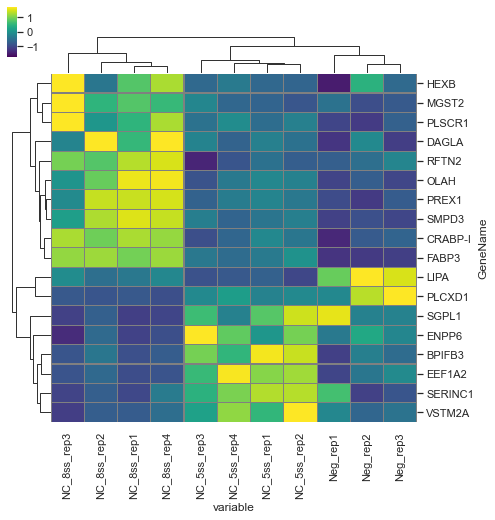

In [9]:
# Filter out only DEGs for heatmap analysis
degs_list = significant_genes['GeneStableID'].tolist()
degs_counts = merged_counts.loc[merged_counts['GeneStableID'].isin(degs_list)]
conditions_list = ['GeneName',
            'Neg_rep1', 'Neg_rep2', 'Neg_rep3',
            'NC_5ss_rep1', 'NC_5ss_rep2', 'NC_5ss_rep3', 'NC_5ss_rep4',                   
            'NC_8ss_rep1', 'NC_8ss_rep2', 'NC_8ss_rep3', 'NC_8ss_rep4',                   
             ]

# Assemble heatmap dataset for Seaborn formatting
heatmap_df = degs_counts.filter(conditions_list, axis=1).drop_duplicates()
melted = pd.melt(heatmap_df, id_vars=['GeneName'])
heatmap_data = pd.pivot_table(melted, values='value', 
                              index=['GeneName'], 
                              columns='variable')

# OPTIONAL: transpose data to rotate heatmap
# heatmap_data = heatmap_data.transpose()

# Assemble heatmap
sns.set(font_scale=1.0)
g = sns.clustermap(heatmap_data
            # Clustering parameters:
                   ,method='complete', metric='euclidean', z_score=0
                   ,col_cluster=True, row_cluster=True
                   ,dendrogram_ratio=0.1
            # Plot customizations
                   ,cmap='viridis'
                   ,figsize=(7,7)
                   ,vmin=-1.75, vmax=1.75            
#                    ,cbar_pos=None
                   ,cbar_pos=(0.02, 0.93, 0.02, 0.1)
                   ,tree_kws=dict(linewidths=1.)
                   ,linewidths=0.1,linecolor='gray'
                  )

# OPTIONAL: save out heatmap
g.savefig('../Python_plots/' + analysis_date + ' ' + GO_mode + ' ' + identifier + ' sigDEGS heatmap seaborn.png')

# OPTIONAL: save out data for plotting in R (pheatmap)
degs_counts = degs_counts[['GeneStableID', 'GeneName', 'GeneDescription', 
                            'Neg_rep1', 'Neg_rep2', 'Neg_rep3',
                            'NC_5ss_rep1', 'NC_5ss_rep2', 'NC_5ss_rep3', 'NC_5ss_rep4',                   
                            'NC_8ss_rep1', 'NC_8ss_rep2', 'NC_8ss_rep3', 'NC_8ss_rep4'
                          ]]
degs_counts.to_csv('../' + analysis_date + ' ' + GO_mode + ' ' + identifier + ' sigDEGS featureCounts.csv')

print(str(len(significant_down)+len(significant_up))
      +' significant DEGs with ' + GO_mode + ' containing "'+ identifier+'".')

## Strip plot to display specific gene expression trends

In [10]:
# Define gene list you'd like to parse
genes_list=['SMPD3']

# Filter out only DEGs for heatmap analysis
conditions_list = ['GeneName',     
            'NC_5ss_rep1','NC_5ss_rep2','NC_5ss_rep3','NC_5ss_rep4',                   
            'NC_8ss_rep1','NC_8ss_rep2','NC_8ss_rep3','NC_8ss_rep4',                   
             ]

# Assemble df for strip plots
merged_counts_filtered = merged_counts.filter(conditions_list, axis=1).drop_duplicates()
merged_counts_melted = pd.melt(merged_counts_filtered, id_vars=['GeneName'])
data_for_strip = merged_counts_melted.rename(columns={"variable": "Sample", "value": "Counts"})
data_for_strip.replace(to_replace=['Neg_rep1','Neg_rep2','Neg_rep3','NC_5ss_rep1','NC_5ss_rep2',
                                     'NC_5ss_rep3','NC_5ss_rep4','NC_8ss_rep1','NC_8ss_rep2',
                                     'NC_8ss_rep3','NC_8ss_rep4']
                         ,value=['Non-NC','Non-NC','Non-NC','NC 5ss','NC 5ss',
                                 'NC 5ss','NC 5ss','NC 8ss','NC 8ss','NC 8ss','NC 8ss',], inplace=True)
data = data_for_strip.loc[data_for_strip['GeneName'].isin(genes_list)]

#Plot strip plot of this data
p = iqplot.strip(
    data=data,
    q='Counts',
    q_axis='y',
    cats=['Sample'],
    show_legend=False,
    y_range=(0,1400),
    palette=['black', 'black', 'black'],
    frame_width=150,
    frame_height=300,
    marker_kwargs=dict(size=7),
    jitter=True,
    order=[ 'NC 5ss', 'NC 8ss'],
     )

p.yaxis.axis_label='SMPD3 expression level (counts)'
p.xaxis.axis_label='Tissue'
p.xaxis.major_label_orientation=13.25
# Other customization parameters
p.axis.axis_label_text_font_size = '18px'
p.axis.axis_label_text_font_style = 'normal'
p.axis.major_label_text_font_size = '13px'

bokeh.io.show(p)

## Interactive bar plot for log2 fold change

In [11]:
# Sort and separate DEGS df
sorted_degs = significant_genes.sort_values(['log2FC'], ascending=False)
up, down = (sorted_degs.loc[sorted_degs['log2FC'] > 0],
        sorted_degs.loc[sorted_degs['log2FC'] < 0])

# Assemble individual plots (up/down)
bar_up = hv.Bars(data=up, kdims=['GeneName'], vdims=['log2FC']
                ).opts(tools=['hover'],color='#D22B25')
bar_down = hv.Bars(data=down, kdims=['GeneName'], vdims=['log2FC']
                  ).opts(tools=['hover'], color='#6298C6')
bar_degs = bar_up*bar_down

# Format plot details
bar_degs = bar_degs.redim.label(GeneName= 'Gene Name', log2FC='Log\u2082 Fold Change')
bar_degs.opts(height=400, width=600)
bar_degs.opts(xrotation=90)
bar_degs.opts(border_line_width=10)
bar_degs.opts(show_grid=True)

# Display plot
bar_degs

:Overlay
   .Bars.I  :Bars   [GeneName]   (log2FC)
   .Bars.II :Bars   [GeneName]   (log2FC)

## Volcano Plots (Interactive)

### Full view of interactive volcano plot

In [17]:
# Make plot of up values
vol_up = hv.Points(
    data=significant_up,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','GeneDescription','baseMean','log2FC'],
).opts(tools=['hover'],color='#D22B25',size=10,line_color='black',line_width=0.5,alpha=0.9)

# Make plot of down values
vol_down = hv.Points(
    data=significant_down,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','GeneDescription','baseMean','log2FC'],
).opts(tools=['hover'],color='#6298C6',size=10,line_color='black',line_width=0.5,alpha=0.9)

# Make plot of all values except those in up/down
nonsignificant_genes = all_genes[~all_genes.isin(significant_up)].dropna()
nonsignificant_genes = nonsignificant_genes[~nonsignificant_genes.isin(significant_down)].dropna()
vol_all = hv.Points(
    data=nonsignificant_genes,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','baseMean','log2FC'],
).opts(tools=['hover'], color='lightgray', size=6, line_width=0)

# Combine plots and display final Volcano plot
final_vol = vol_all * vol_up * vol_down

# Format plot details
final_vol.opts(show_grid=True)
final_vol = final_vol.redim.label(log2FC='Log\u2082 Fold Change', neglogpadj= '-Log\u2081\u2080 P-value')
final_vol.opts(fontsize={'title': 16, 'labels': 14, 'xticks': 12, 'yticks': 12})
final_vol.opts(height=450, width=500)
final_vol.opts(ylim=(-1, 20))            # Display downregulated genes

# Display plot
final_vol

:Overlay
   .Points.I   :Points   [log2FC,neglogpadj]   (GeneName,baseMean,log2FC)
   .Points.II  :Points   [log2FC,neglogpadj]   (GeneName,GeneDescription,baseMean,log2FC)
   .Points.III :Points   [log2FC,neglogpadj]   (GeneName,GeneDescription,baseMean,log2FC)

### Volcano plot insets with gene labels

In [22]:
# Make plot of up values
vol_up = hv.Points(
    data=significant_up,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','GeneDescription','baseMean','log2FC'],
).opts(tools=['hover'],color='#D22B25',size=20,line_color='black',line_width=0.5,alpha=0.9)

# Make plot of down values
vol_down = hv.Points(
    data=significant_down,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','GeneDescription','baseMean','log2FC'],
).opts(tools=['hover'],color='#6298C6',size=20,line_color='black',line_width=0.5,alpha=0.9)

# Make plot of all values except those in up/down
nonsignificant_genes = all_genes[~all_genes.isin(significant_up)].dropna()
nonsignificant_genes = nonsignificant_genes[~nonsignificant_genes.isin(significant_down)].dropna()
vol_all = hv.Points(
    data=nonsignificant_genes,kdims=['log2FC', 'neglogpadj'],vdims=['GeneName','baseMean','log2FC'],
).opts(tools=['hover'], color='lightgray', size=12, line_width=0)
final_vol = vol_all * vol_up * vol_down

# Optional: display plots with up and down labels
up_labels = hv.Labels(data=significant_up, kdims = ['log2FC', 'neglogpadj'],
                     vdims = ['GeneName']).opts(xoffset=0, yoffset=0.2, text_font_size='14pt', text_font_style='italic')
down_labels = hv.Labels(data=significant_down, kdims = ['log2FC', 'neglogpadj'],
                     vdims = ['GeneName']).opts(xoffset=0, yoffset=0.2, text_font_size='14pt', text_font_style='italic')
# final_vol = vol_all * vol_up * up_labels * vol_down * down_labels

# Format plot details
final_vol.opts(show_grid=True)
final_vol = final_vol.redim.label(log2FC='Log\u2082 Fold Change', neglogpadj= '-Log\u2081\u2080 P-value')
final_vol.opts(fontsize={'title': 16, 'labels': 14, 'xticks': 12, 'yticks': 12})
final_vol.opts(height=400, width=650)

# final_vol.opts(xlim=(0.5, 2), ylim=(1, 4.5))              # Display upregulated genes
# final_vol.opts(xlim=(-2.5, -0.5), ylim=(1.5, 4.5))            # Display downregulated genes
final_vol.opts(xlim=(-2.5, 2.5), ylim=(1, 4.5))              # Display all significant lipid effector genes

# Display plot
final_vol

:Overlay
   .Points.I   :Points   [log2FC,neglogpadj]   (GeneName,baseMean,log2FC)
   .Points.II  :Points   [log2FC,neglogpadj]   (GeneName,GeneDescription,baseMean,log2FC)
   .Points.III :Points   [log2FC,neglogpadj]   (GeneName,GeneDescription,baseMean,log2FC)